In [1]:
import os
os.chdir('../../')

import DeepPurpose.models as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

RDKit WARNING: [19:19:36] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
X_drug, X_target, y = load_process_DAVIS('./data/', binary=False)

drug_encoding = 'Morgan'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2], random_seed = 1)

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )

Beginning Processing...
Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
protein encoding finished...
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 29.526173. Total time 0.0011111111111111111 hours
Validation at Epoch 1 , MSE: 0.6438873386713347 , Pearson Correlation: 0.44497796875905304 with p-value: 3.798806812231001e-146 , Concordance Index: 0.7484500584157131
Training at Epoch 2 iteration 0 with loss 0.9031817. Total time 0.014444444444444444 hours
Validation at Epoch 2 , MSE: 0.6188833572315838 , Pearson Correlation: 0.48146078631780026 with p-value: 2.8747944664457594e-174 , Concordance Index: 0.7637754372377619
Training at Epoch 3 iteration 0 with loss 0.60958827. Total time 0.028333333333333332 hours
Validation at Epoch 3 , MSE: 0.5760576944580214 , Pearson Correlation: 0.5328022664589188 with p-value: 4.230480206330525e-220 , Concordance Index: 0.777635692770753
Training at Epoch 4 iteration 0 with loss 0.54010034. Total time 0.041944444444444444 hours
Validation at Epoch 4 , MSE: 0.55244981083277 , Pearson Correlat

Validation at Epoch 34 , MSE: 0.35954861459795884 , Pearson Correlation: 0.7686182820090002 with p-value: 0.0 , Concordance Index: 0.8546179216327356
Training at Epoch 35 iteration 0 with loss 0.30441898. Total time 0.5519444444444445 hours
Validation at Epoch 35 , MSE: 0.34472915728407766 , Pearson Correlation: 0.7675368045425425 with p-value: 0.0 , Concordance Index: 0.8446848301763913
Training at Epoch 36 iteration 0 with loss 0.2564814. Total time 0.5694444444444444 hours
Validation at Epoch 36 , MSE: 0.36878098988799796 , Pearson Correlation: 0.7696570923641557 with p-value: 0.0 , Concordance Index: 0.8530647897364362
Training at Epoch 37 iteration 0 with loss 0.43992943. Total time 0.5858333333333333 hours
Validation at Epoch 37 , MSE: 0.4512532408892666 , Pearson Correlation: 0.7697239381294669 with p-value: 0.0 , Concordance Index: 0.8476227775076403
Training at Epoch 38 iteration 0 with loss 0.36520672. Total time 0.6025 hours
Validation at Epoch 38 , MSE: 0.3109150622578607 ,

Training at Epoch 69 iteration 0 with loss 0.1857999. Total time 1.1044444444444443 hours
Validation at Epoch 69 , MSE: 0.26194495721610933 , Pearson Correlation: 0.8208161337368325 with p-value: 0.0 , Concordance Index: 0.8791122571787521
Training at Epoch 70 iteration 0 with loss 0.1672822. Total time 1.1216666666666666 hours
Validation at Epoch 70 , MSE: 0.29988523493890135 , Pearson Correlation: 0.8191067908102758 with p-value: 0.0 , Concordance Index: 0.8756891624000828
Training at Epoch 71 iteration 0 with loss 0.25034988. Total time 1.1391666666666667 hours
Validation at Epoch 71 , MSE: 0.25854512908078986 , Pearson Correlation: 0.8260714141898187 with p-value: 0.0 , Concordance Index: 0.8821001493946108
Training at Epoch 72 iteration 0 with loss 0.1527545. Total time 1.1558333333333333 hours
Validation at Epoch 72 , MSE: 0.25121423340267984 , Pearson Correlation: 0.8293914789879575 with p-value: 0.0 , Concordance Index: 0.8795074158252677
Training at Epoch 73 iteration 0 with l

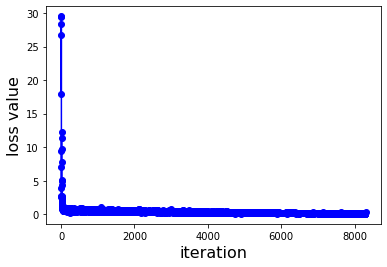

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [5]:
model.save_model('./model_morgan_cnn_davis')

in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU. Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
splitting dataset...
Done.
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.344112. Total time 0.0 hours
Validation at Epoch 1 , MSE: 0.5871785679320654 , Pearson Correlation: 0.5155775224461056 with p-value: 7.684753662319694e-204 , Concordance Index: 0.7743305295257876
Training at Epoch 2 iteration 0 with loss 0.66393197. Total time 0.0044444444444444444 hours
Validation at Epoch 2 , MSE: 0.5734940690878204 , Pearson Correlation: 0.5703939042601408 with p-value: 4.822717145930956e-259 , Concordance Index: 0.7983808616482692
Training at Epoch 3 iteration 0 with loss 0.59895194. Total time 0.0086111

Validation at Epoch 33 , MSE: 0.37585065433763826 , Pearson Correlation: 0.7430181751660546 with p-value: 0.0 , Concordance Index: 0.8493402654779637
Training at Epoch 34 iteration 0 with loss 0.32552582. Total time 0.14444444444444443 hours
Validation at Epoch 34 , MSE: 0.34821299150375407 , Pearson Correlation: 0.755460136967872 with p-value: 0.0 , Concordance Index: 0.8518489508273909
Training at Epoch 35 iteration 0 with loss 0.3373136. Total time 0.14888888888888888 hours
Validation at Epoch 35 , MSE: 0.3338728508992281 , Pearson Correlation: 0.763647533378427 with p-value: 0.0 , Concordance Index: 0.850279977381788
Training at Epoch 36 iteration 0 with loss 0.27944204. Total time 0.15333333333333332 hours
Validation at Epoch 36 , MSE: 0.3938836785190391 , Pearson Correlation: 0.7662814544363088 with p-value: 0.0 , Concordance Index: 0.8405955102409015
Training at Epoch 37 iteration 0 with loss 0.48079798. Total time 0.15777777777777777 hours
Validation at Epoch 37 , MSE: 0.385881

Training at Epoch 68 iteration 0 with loss 0.31294996. Total time 0.29305555555555557 hours
Validation at Epoch 68 , MSE: 0.2903028030694549 , Pearson Correlation: 0.8033908863788942 with p-value: 0.0 , Concordance Index: 0.8722009412520545
Training at Epoch 69 iteration 0 with loss 0.28152618. Total time 0.2972222222222222 hours
Validation at Epoch 69 , MSE: 0.2969954949737917 , Pearson Correlation: 0.8041271441036234 with p-value: 0.0 , Concordance Index: 0.868046934990242
Training at Epoch 70 iteration 0 with loss 0.2317029. Total time 0.3016666666666667 hours
Validation at Epoch 70 , MSE: 0.29114854334707446 , Pearson Correlation: 0.8118166642733508 with p-value: 0.0 , Concordance Index: 0.8658500201319689
Training at Epoch 71 iteration 0 with loss 0.26556963. Total time 0.3061111111111111 hours
Validation at Epoch 71 , MSE: 0.28978233863216074 , Pearson Correlation: 0.8077034195791695 with p-value: 0.0 , Concordance Index: 0.871406003507143
Training at Epoch 72 iteration 0 with lo

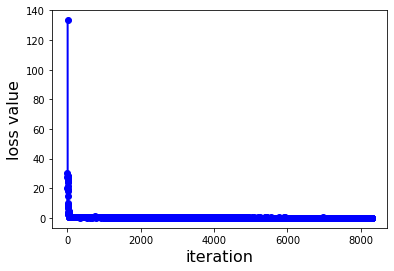

In [10]:
drug_encoding = 'Morgan'
target_encoding = 'AAC'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2], random_seed = 1)

config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256
                        )
model = models.model_initialize(**config)
model.train(train, val, test)

In [11]:
model.save_model('./model_morgan_aac_davis')

in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU. Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
splitting dataset...
Done.
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 28.809708. Total time 0.0 hours
Validation at Epoch 1 , MSE: 0.6990874172339071 , Pearson Correlation: 0.42921889210830116 with p-value: 5.0743681438098573e-135 , Concordance Index: 0.7258030914286687
Training at Epoch 2 iteration 0 with loss 0.7004984. Total time 0.0044444444444444444 hours
Validation at Epoch 2 , MSE: 0.6186377116105821 , Pearson Correlation: 0.5604411636287655 with p-value: 3.043390900374387e-248 , Concordance Index: 0.7892900178675859
Training at Epoch 3 iteration 0 with loss 0.6513033. Total time 0.0091666

Validation at Epoch 33 , MSE: 0.3984849204066156 , Pearson Correlation: 0.7496764123045684 with p-value: 0.0 , Concordance Index: 0.8557110543622722
Training at Epoch 34 iteration 0 with loss 0.31306297. Total time 0.14777777777777779 hours
Validation at Epoch 34 , MSE: 0.3588889730577189 , Pearson Correlation: 0.7549821449534196 with p-value: 0.0 , Concordance Index: 0.8547060845441232
Training at Epoch 35 iteration 0 with loss 0.3076544. Total time 0.15222222222222223 hours
Validation at Epoch 35 , MSE: 0.38525350698673755 , Pearson Correlation: 0.7459946297260125 with p-value: 0.0 , Concordance Index: 0.855661919592806
Training at Epoch 36 iteration 0 with loss 0.34423864. Total time 0.15666666666666668 hours
Validation at Epoch 36 , MSE: 0.36790512619749355 , Pearson Correlation: 0.7546922143893994 with p-value: 0.0 , Concordance Index: 0.8443786111325848
Training at Epoch 37 iteration 0 with loss 0.3554378. Total time 0.1613888888888889 hours
Validation at Epoch 37 , MSE: 0.370483

Training at Epoch 68 iteration 0 with loss 0.19814369. Total time 0.30027777777777775 hours
Validation at Epoch 68 , MSE: 0.2872147129769966 , Pearson Correlation: 0.8113269353503416 with p-value: 0.0 , Concordance Index: 0.8727409470825084
Training at Epoch 69 iteration 0 with loss 0.24266008. Total time 0.3047222222222222 hours
Validation at Epoch 69 , MSE: 0.2916058985317181 , Pearson Correlation: 0.8062423611963588 with p-value: 0.0 , Concordance Index: 0.8672592538241045
Training at Epoch 70 iteration 0 with loss 0.1563178. Total time 0.30916666666666665 hours
Validation at Epoch 70 , MSE: 0.2935255137267786 , Pearson Correlation: 0.8084621564528673 with p-value: 0.0 , Concordance Index: 0.8700073068861615
Training at Epoch 71 iteration 0 with loss 0.15340568. Total time 0.3136111111111111 hours
Validation at Epoch 71 , MSE: 0.2970170682235651 , Pearson Correlation: 0.8122645234615193 with p-value: 0.0 , Concordance Index: 0.8850606716133369
Training at Epoch 72 iteration 0 with l

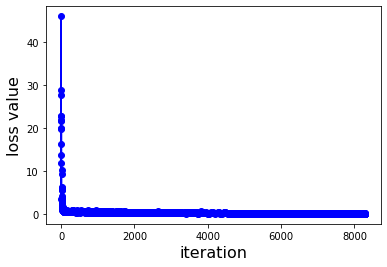

In [15]:
drug_encoding = 'Daylight'
target_encoding = 'AAC'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2], random_seed = 2)

config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256
                        )
model = models.model_initialize(**config)
model.train(train, val, test)

in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU. Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
splitting dataset...
Done.
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.021671. Total time 0.0 hours
Validation at Epoch 1 , MSE: 0.5775174716056777 , Pearson Correlation: 0.5173547370017926 with p-value: 1.7826284794483282e-205 , Concordance Index: 0.7729638689059245
Training at Epoch 2 iteration 0 with loss 0.5706534. Total time 0.004722222222222222 hours
Validation at Epoch 2 , MSE: 0.6156375524315493 , Pearson Correlation: 0.5564157670618001 with p-value: 5.5991267289305066e-244 , Concordance Index: 0.7952701033722209
Training at Epoch 3 iteration 0 with loss 0.50544286. Total time 0.0091666

Training at Epoch 33 iteration 0 with loss 0.2507778. Total time 0.14416666666666667 hours
Validation at Epoch 33 , MSE: 0.2848878879278299 , Pearson Correlation: 0.8019220578549057 with p-value: 0.0 , Concordance Index: 0.8717618307528532
Training at Epoch 34 iteration 0 with loss 0.33342096. Total time 0.1486111111111111 hours
Validation at Epoch 34 , MSE: 0.2985492865743375 , Pearson Correlation: 0.7957396615477498 with p-value: 0.0 , Concordance Index: 0.8717170193650773
Training at Epoch 35 iteration 0 with loss 0.2640287. Total time 0.15305555555555556 hours
Validation at Epoch 35 , MSE: 0.29450939551442595 , Pearson Correlation: 0.803340836624003 with p-value: 0.0 , Concordance Index: 0.8625492652025365
Training at Epoch 36 iteration 0 with loss 0.24533737. Total time 0.1575 hours
Validation at Epoch 36 , MSE: 0.28698549989061195 , Pearson Correlation: 0.7969344533793046 with p-value: 0.0 , Concordance Index: 0.8658808279395724
Training at Epoch 37 iteration 0 with loss 0.279025

Validation at Epoch 67 , MSE: 0.2565854866104139 , Pearson Correlation: 0.8269484190404213 with p-value: 0.0 , Concordance Index: 0.8788232310977916
Training at Epoch 68 iteration 0 with loss 0.14208484. Total time 0.30194444444444446 hours
Validation at Epoch 68 , MSE: 0.23913331459254347 , Pearson Correlation: 0.8366206209700403 with p-value: 0.0 , Concordance Index: 0.8729669291958214
Training at Epoch 69 iteration 0 with loss 0.13839284. Total time 0.3063888888888889 hours
Validation at Epoch 69 , MSE: 0.23960917226486578 , Pearson Correlation: 0.8342314751754887 with p-value: 0.0 , Concordance Index: 0.8809221527827872
Training at Epoch 70 iteration 0 with loss 0.1552459. Total time 0.31083333333333335 hours
Validation at Epoch 70 , MSE: 0.24857030868621438 , Pearson Correlation: 0.8314631630045396 with p-value: 0.0 , Concordance Index: 0.8867028218058771
Training at Epoch 71 iteration 0 with loss 0.13030308. Total time 0.31527777777777777 hours
Validation at Epoch 71 , MSE: 0.232

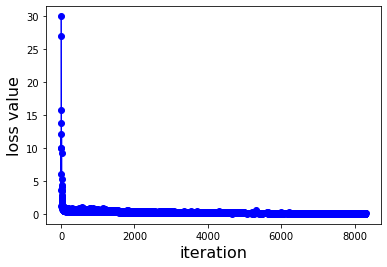

In [16]:
drug_encoding = 'Daylight'
target_encoding = 'AAC'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2], random_seed = 3)

config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256
                        )
model = models.model_initialize(**config)
model.train(train, val, test)

In [17]:
model.save_model('./model_daylight_aac_davis')

in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU. Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
splitting dataset...
Done.
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.415342. Total time 0.0 hours
Validation at Epoch 1 , MSE: 0.597644265458756 , Pearson Correlation: 0.5022846090377954 with p-value: 6.442827263775153e-192 , Concordance Index: 0.7695108853638115
Training at Epoch 2 iteration 0 with loss 0.68322444. Total time 0.0044444444444444444 hours
Validation at Epoch 2 , MSE: 0.5856314748832313 , Pearson Correlation: 0.5512794406454162 with p-value: 1.2755326315764469e-238 , Concordance Index: 0.7974109945046625
Training at Epoch 3 iteration 0 with loss 0.4816273. Total time 0.00916666

Training at Epoch 33 iteration 0 with loss 0.22432293. Total time 0.14333333333333334 hours
Validation at Epoch 33 , MSE: 0.32834797224909945 , Pearson Correlation: 0.7816619056291014 with p-value: 0.0 , Concordance Index: 0.8816513689604812
Training at Epoch 34 iteration 0 with loss 0.26770258. Total time 0.14777777777777779 hours
Validation at Epoch 34 , MSE: 0.30953288878680946 , Pearson Correlation: 0.7847368774557187 with p-value: 0.0 , Concordance Index: 0.882068697812135
Training at Epoch 35 iteration 0 with loss 0.22227652. Total time 0.15222222222222223 hours
Validation at Epoch 35 , MSE: 0.3157685812036275 , Pearson Correlation: 0.7839151361763063 with p-value: 0.0 , Concordance Index: 0.8847882980815928
Training at Epoch 36 iteration 0 with loss 0.21576764. Total time 0.15666666666666668 hours
Validation at Epoch 36 , MSE: 0.3185862285747615 , Pearson Correlation: 0.787720347715241 with p-value: 0.0 , Concordance Index: 0.8815752140605444
Training at Epoch 37 iteration 0 wit

Validation at Epoch 67 , MSE: 0.27679818858322264 , Pearson Correlation: 0.8150895265485233 with p-value: 0.0 , Concordance Index: 0.8907033579523993
Training at Epoch 68 iteration 0 with loss 0.12478429. Total time 0.3011111111111111 hours
Validation at Epoch 68 , MSE: 0.2594479823449427 , Pearson Correlation: 0.8205125650507176 with p-value: 0.0 , Concordance Index: 0.8830521839484619
Training at Epoch 69 iteration 0 with loss 0.15847209. Total time 0.3055555555555556 hours
Validation at Epoch 69 , MSE: 0.2768866245948212 , Pearson Correlation: 0.8180305357118526 with p-value: 0.0 , Concordance Index: 0.8866345104414896
Training at Epoch 70 iteration 0 with loss 0.089035966. Total time 0.31 hours
Validation at Epoch 70 , MSE: 0.27557341165099236 , Pearson Correlation: 0.8158229857401073 with p-value: 0.0 , Concordance Index: 0.8859319270932153
Training at Epoch 71 iteration 0 with loss 0.14712405. Total time 0.31444444444444447 hours
Validation at Epoch 71 , MSE: 0.2763396706988294 ,

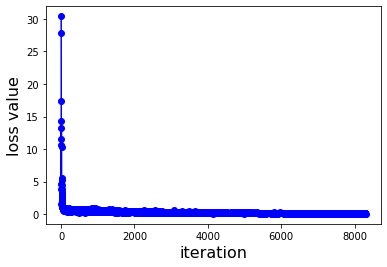

In [20]:
drug_encoding = 'Daylight'
target_encoding = 'AAC'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2], random_seed = 4)

config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256
                        )
model = models.model_initialize(**config)
model.train(train, val, test)

in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU. Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
splitting dataset...
Done.
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 31.208525. Total time 0.0 hours
Validation at Epoch 1 , MSE: 0.5806354832674486 , Pearson Correlation: 0.5308263905270906 with p-value: 3.4635955070887546e-218 , Concordance Index: 0.7804595644121116
Training at Epoch 2 iteration 0 with loss 0.61080545. Total time 0.004722222222222222 hours
Validation at Epoch 2 , MSE: 0.5669940899150946 , Pearson Correlation: 0.5478108932424763 with p-value: 4.689809267122636e-235 , Concordance Index: 0.7851076032747791
Training at Epoch 3 iteration 0 with loss 0.35325673. Total time 0.0091666

Training at Epoch 33 iteration 0 with loss 0.29469612. Total time 0.1463888888888889 hours
Validation at Epoch 33 , MSE: 0.2920422235785991 , Pearson Correlation: 0.7977561631441544 with p-value: 0.0 , Concordance Index: 0.8605711242445346
Training at Epoch 34 iteration 0 with loss 0.25720245. Total time 0.1511111111111111 hours
Validation at Epoch 34 , MSE: 0.34922402151093607 , Pearson Correlation: 0.7970544759680823 with p-value: 0.0 , Concordance Index: 0.8532030867618109
Training at Epoch 35 iteration 0 with loss 0.3377993. Total time 0.15555555555555556 hours
Validation at Epoch 35 , MSE: 0.3037009698574468 , Pearson Correlation: 0.8011539720836757 with p-value: 0.0 , Concordance Index: 0.8529076925398944
Training at Epoch 36 iteration 0 with loss 0.3581165. Total time 0.16027777777777777 hours
Validation at Epoch 36 , MSE: 0.2889946139336768 , Pearson Correlation: 0.8017710676549953 with p-value: 0.0 , Concordance Index: 0.8574972994068398
Training at Epoch 37 iteration 0 with l

Validation at Epoch 67 , MSE: 0.25366977261317597 , Pearson Correlation: 0.82908421788315 with p-value: 0.0 , Concordance Index: 0.8694333821344712
Training at Epoch 68 iteration 0 with loss 0.1197187. Total time 0.30527777777777776 hours
Validation at Epoch 68 , MSE: 0.24880973942120788 , Pearson Correlation: 0.8315622711662181 with p-value: 0.0 , Concordance Index: 0.8760019146720369
Training at Epoch 69 iteration 0 with loss 0.12127585. Total time 0.31 hours
Validation at Epoch 69 , MSE: 0.25458089426706887 , Pearson Correlation: 0.8309931567967482 with p-value: 0.0 , Concordance Index: 0.8774467589647834
Training at Epoch 70 iteration 0 with loss 0.16763896. Total time 0.31416666666666665 hours
Validation at Epoch 70 , MSE: 0.24782743174551242 , Pearson Correlation: 0.8342114447345709 with p-value: 0.0 , Concordance Index: 0.8831963810973572
Training at Epoch 71 iteration 0 with loss 0.12881391. Total time 0.3188888888888889 hours
Validation at Epoch 71 , MSE: 0.2478348653358513 , 

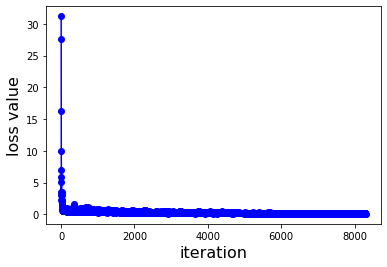

In [21]:
drug_encoding = 'Daylight'
target_encoding = 'AAC'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2], random_seed = 5)

config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256
                        )
model = models.model_initialize(**config)
model.train(train, val, test)